# Final Questions Used In Report

In [10]:
# Imports and read in file
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
combined_songs = pd.read_csv('combined_songs.csv')

In [12]:
# Define 
popular_tracks = combined_songs[combined_songs['popularity']>75]
average_loudness_per_year = popular_tracks.groupby('release_year')['loudness'].mean().reset_index()

### Question 1 - Is there a significant correlation between a song’s attributes (tempo, danceability, and loudness) and its popularity over the years?

Correlation coefficient between Tempo and Popularity: -0.025774314407053803


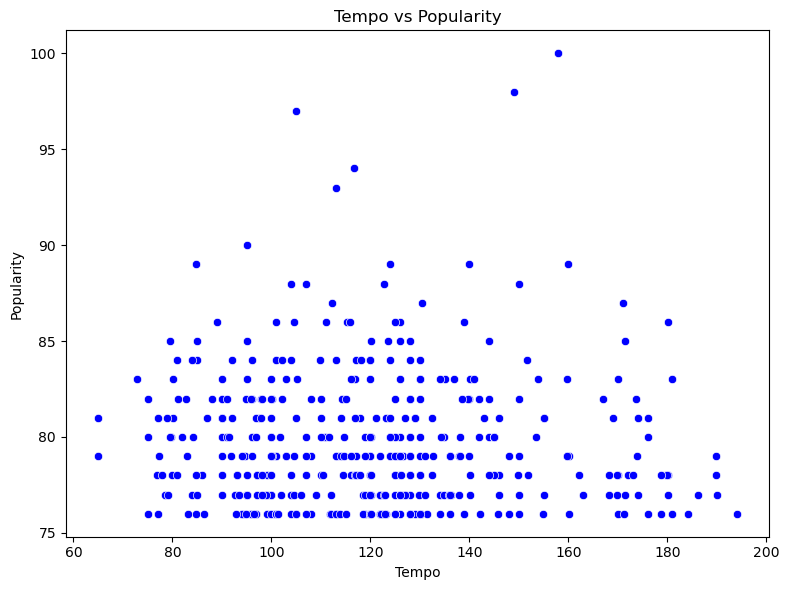

In [18]:
# Correlation between Tempo Vs Popularity 
correlation = popular_tracks['tempo'].corr(popular_tracks['popularity'])
print(f"Correlation coefficient between Tempo and Popularity: {correlation}")

plt.figure(figsize=(8,6))
sns.scatterplot(data=popular_tracks, x='tempo', y='popularity', color='blue')
plt.title('Tempo vs Popularity')
plt.xlabel('Tempo')
plt.ylabel('Popularity')
plt.tight_layout()
plt.show()

Correlation coefficient between Danceability and Popularity: -0.0014537783133195758


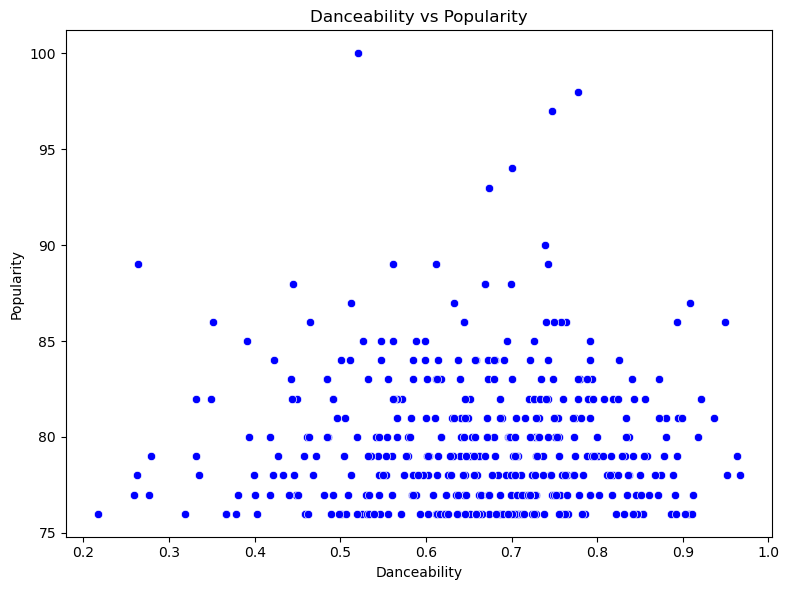

In [20]:
# Correlation between Danceability and popularity
correlation = popular_tracks['danceability'].corr(popular_tracks['popularity'])
print(f"Correlation coefficient between Danceability and Popularity: {correlation}")

plt.figure(figsize=(8,6))
sns.scatterplot(data=popular_tracks, x='danceability', y='popularity', color='blue')
plt.title('Danceability vs Popularity')
plt.xlabel('Danceability')
plt.ylabel('Popularity')
plt.tight_layout()
plt.show()

Correlation coefficient between Loudness and Popularity: -0.05796625809953363


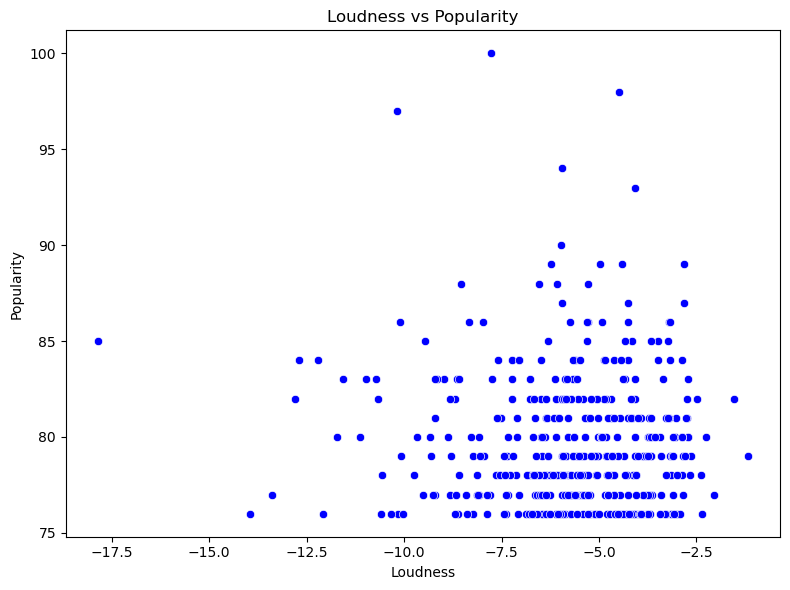

In [22]:
# Correlation between Loudness and popularity
correlation = popular_tracks['loudness'].corr(popular_tracks['popularity'])
print(f"Correlation coefficient between Loudness and Popularity: {correlation}")

plt.figure(figsize=(8,6))
sns.scatterplot(data=popular_tracks, x='loudness', y='popularity', color='blue')
plt.title('Loudness vs Popularity')
plt.xlabel('Loudness')
plt.ylabel('Popularity')
plt.tight_layout()
plt.show()

### Question 2 - Trends in Attributes Compared to Popularity Trends

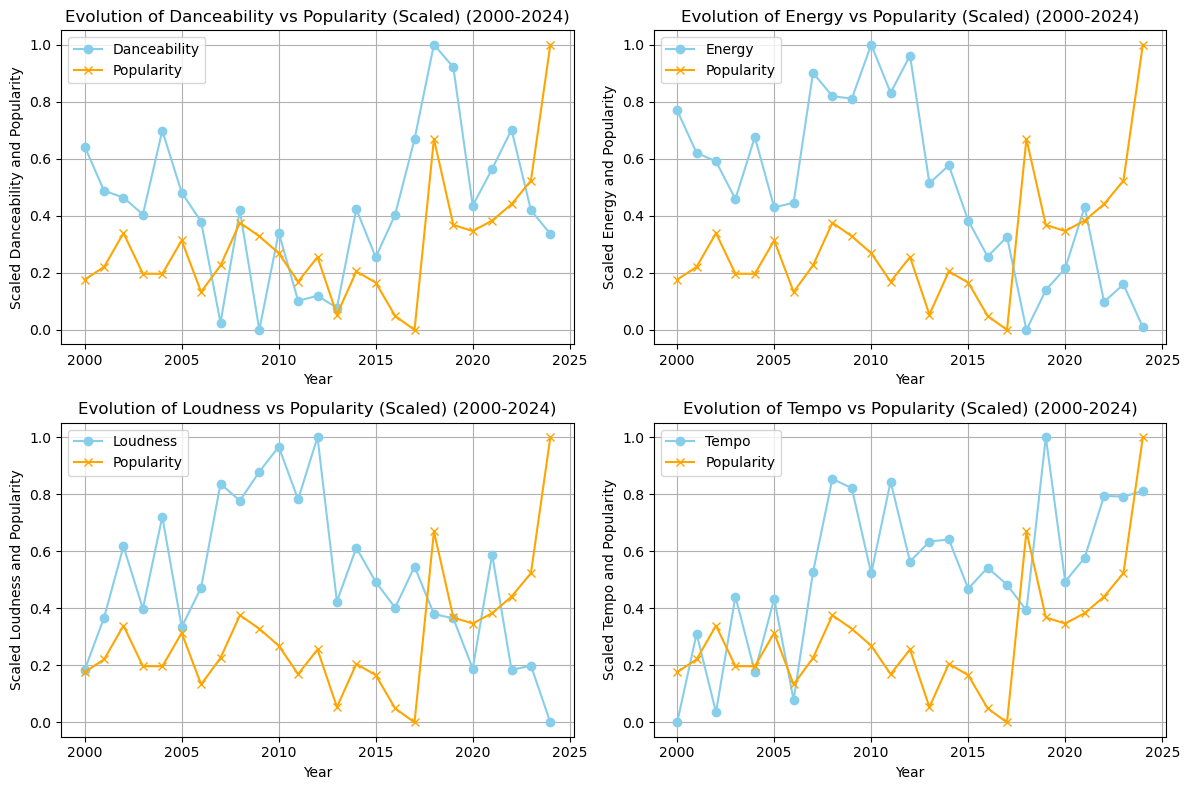

In [31]:
data = pd.read_csv('combined_songs.csv')
data_filtered = data[(data['release_year'] >= 2000) & (data['release_year'] <= 2024)]

from sklearn.preprocessing import MinMaxScaler
attributes = ['danceability', 'energy', 'loudness', 'tempo', 'popularity']

# Ensure all attributes are numeric
data[attributes] = data[attributes].apply(pd.to_numeric, errors='coerce')

# Calculate the mean for each attribute by year
mean_by_year = data_filtered.groupby('release_year')[attributes].mean().reset_index()

# Scale the data to range [0, 1] using MinMaxScaler
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(mean_by_year[attributes])
scaled_data = pd.DataFrame(
    scaled_values,
    columns=attributes
)
scaled_data['release_year'] = mean_by_year['release_year']  # Add back the release_year column

# Plot the scaled evolution of attributes over time
plt.figure(figsize=(12, 8))

# Create subplots for each attribute (excluding popularity itself)
for i, attribute in enumerate(attributes[:-1], 1):  # Exclude 'popularity' from subplots
    plt.subplot(2, 2, i)
    plt.plot(scaled_data['release_year'], scaled_data[attribute], marker='o', label=attribute.capitalize(), color='skyblue')
    plt.plot(scaled_data['release_year'], scaled_data['popularity'], marker='x', label='Popularity', color='orange')
    plt.title(f'Evolution of {attribute.capitalize()} vs Popularity (Scaled) (2000-2024)')
    plt.xlabel('Year')
    plt.ylabel(f'Scaled {attribute.capitalize()} and Popularity')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

plt.tight_layout()
plt.show()

### Question 3 - Change in Average Popularity Score Per Year

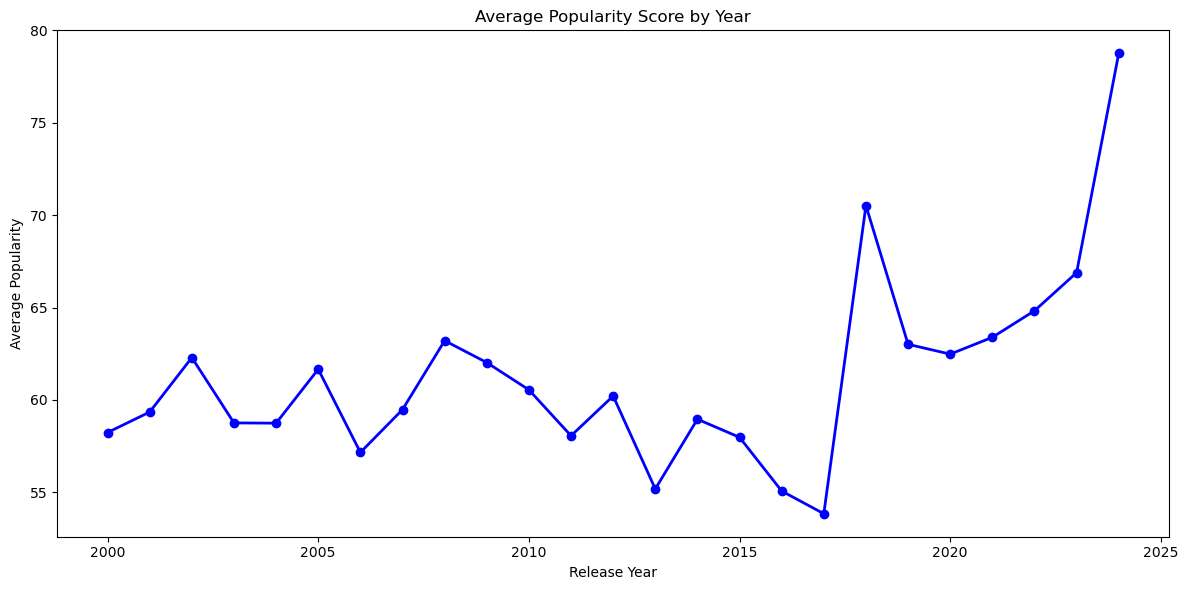

In [34]:
# Group the data by release year and calculate the average popularity for each year
average_popularity_by_year = data.groupby('release_year')['popularity'].mean().reset_index()

# Plotting the average popularity by year
plt.figure(figsize=(12, 6))
plt.plot(average_popularity_by_year['release_year'], average_popularity_by_year['popularity'], marker='o', color='b', linestyle='-', linewidth=2, markersize=6)

# Add labels and title
plt.xlabel('Release Year')
plt.ylabel('Average Popularity')
plt.title('Average Popularity Score by Year')

# Display the plot
plt.tight_layout()
plt.show()

### Question 4 - Change in Music Attributes Between 2000-2019 and 2020-2024

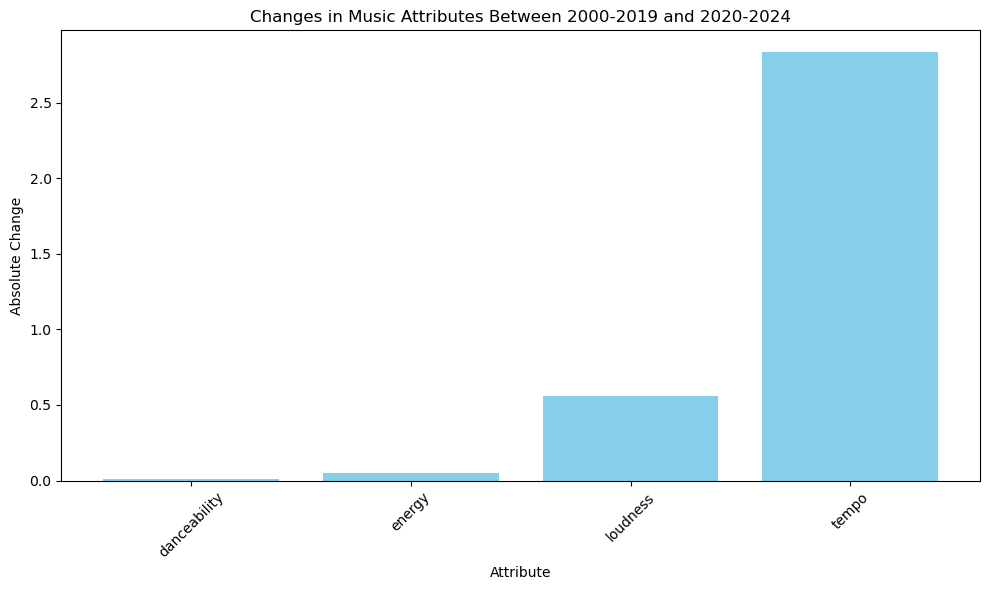

Changes in attributes between 2000-2019 and 2020-2024:
      Attribute    Change
3         tempo  2.836884
2      loudness  0.559321
1        energy  0.049796
0  danceability  0.008199


In [37]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset (replace 'your_dataset.csv' with the actual file path)
data = pd.read_csv('combined_songs.csv')

# Ensure data types are appropriate
attributes = ['danceability', 'energy', 'loudness', 'tempo']
data[attributes] = data[attributes].apply(pd.to_numeric, errors='coerce')
data['release_year'] = pd.to_numeric(data['release_year'], errors='coerce')

# Separate data into two time periods: 2000-2019 and 2020-2024
data_2000_2019 = data[(data['release_year'] >= 2000) & (data['release_year'] <= 2019)]
data_2020_2024 = data[(data['release_year'] >= 2020) & (data['release_year'] <= 2024)]

# Calculate mean values for attributes in each period
mean_2000_2019 = data_2000_2019[attributes].mean()
mean_2020_2024 = data_2020_2024[attributes].mean()

# Calculate the absolute differences between the two periods
attribute_changes = (mean_2020_2024 - mean_2000_2019).abs()

# Prepare data for visualization
change_df = attribute_changes.reset_index()
change_df.columns = ['Attribute', 'Change']

# Plot the changes
plt.figure(figsize=(10, 6))
plt.bar(change_df['Attribute'], change_df['Change'], color='skyblue')
plt.title("Changes in Music Attributes Between 2000-2019 and 2020-2024")
plt.xlabel("Attribute")
plt.ylabel("Absolute Change")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Display the changes
print("Changes in attributes between 2000-2019 and 2020-2024:")
print(change_df.sort_values(by='Change', ascending=False))